Your first requirement is to create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

^do I want average temperature, humidity, cloudiness, wind speed versus latitude???

Notes - latitude ranges from -90 to 90, longitude ranges from -180 to 180 - do I just get random data points from the API...??? Random lat & longitude combos wouldn't work because that's not necessarily a city

In [1]:
 # Dependencies
import requests
import json
import random
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
from config import api_key

In [8]:
#generate random list for latitudes and longitudes in excess of 500 - will need more 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

In [16]:
#Combine latitude and longitude into one tuple

coordinates = tuple(zip(latitude,longitude))

In [45]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in coordinates:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [102]:
#Remove duplicates
cities=list(set(cities))
len(cities)

720

In [103]:
# Create lists to hold city data
lat=[]
lon=[]
temps=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#Loop through cities to request data and write to list
for city in cities:
    
    city_name=city
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=IMPERIAL&appid={api_key}'
    response = requests.get(url).json()
    print(f'City name is {city_name}')
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temps.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
    except KeyError:
        lat.append(np.nan)
        lon.append(np.nan)
        temps.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        
        print('Missing information - skipped ')
        
#    print(f"The {city} temperate is {(response['main']['temp'])}, with {response['main']['humidity']}% humidity, {response['clouds']['all']}% cloudiness, and {response['wind']['speed']}mph winds")

City name is sinnamary
City name is ponnampet
City name is tezu
City name is tortoli
City name is port hedland
City name is penzance
City name is hermanus
City name is mabaruma
City name is chambersburg
City name is russell
City name is anchorage
City name is boende
City name is waddan
City name is oeiras
City name is katsuura
City name is tual
City name is king city
City name is otradnoye
City name is victoria
City name is henties bay
City name is saint anthony
City name is bayan
City name is nabire
City name is guerrero negro
City name is hukuntsi
City name is birjand
City name is aktau
City name is emerald
City name is riyadh
City name is calamar
City name is shchigry
City name is moa
City name is valdosta
City name is port lincoln
City name is bronnoysund
City name is vestmannaeyjar
City name is salinopolis
City name is igrim
City name is vanavara
City name is saldanha
City name is kondoa
City name is nalut
City name is rangoon
City name is karakendzha
Missing information - skipped

City name is lima
City name is cape town
City name is fasa
City name is goundi
City name is yangjiang
City name is cherskiy
City name is codrington
City name is umzimvubu
Missing information - skipped 
City name is husavik
City name is abong mbang
City name is trairi
City name is paragominas
City name is kulhudhuffushi
City name is skjervoy
City name is panama city
City name is perth
City name is hamilton
City name is atuona
City name is ust-kamchatsk
Missing information - skipped 
City name is bluff
City name is lysva
City name is nikki
City name is celestun
City name is la ronge
City name is puerto escondido
City name is taltal
City name is leningradskiy
City name is newport
City name is ornes
City name is bathsheba
City name is denpasar
City name is tura
City name is ondangwa
City name is rypefjord
City name is jinotega
City name is ensenada
City name is viedma
City name is ostrovnoy
City name is namibe
City name is neuquen
City name is dana point
City name is kipini
City name is po

City name is ostrogozhsk
City name is stillwater
City name is luanda
City name is mindelo
City name is carutapera
City name is tiarei
City name is boca do acre
City name is slave lake
City name is zhuhai
City name is binzhou
City name is ilulissat
City name is cotui
City name is ilebo
City name is harindanga
City name is nichinan
City name is hunza
Missing information - skipped 
City name is todos santos
City name is comodoro rivadavia
City name is bandarbeyla
City name is el balyana
Missing information - skipped 
City name is imuris
City name is la cruz
City name is letterkenny
City name is nemuro
City name is lompoc
City name is bonavista
City name is bacalar
City name is nioro
City name is fort nelson
City name is bayanday
City name is kastamonu
City name is east london
City name is shache
City name is aklavik
City name is chuy
City name is general roca
City name is kautokeino
City name is kampot
City name is lagoa
City name is tessalit
City name is mogadishu
City name is kavaratti


<function matplotlib.pyplot.show(*args, **kw)>

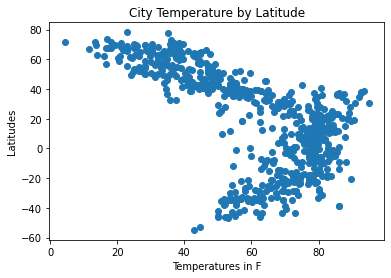

In [106]:
#Build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(temps, lat, marker="o")

#Incorporate the other graph properties
plt.title("City Temperature by Latitude")
plt.xlabel("Temperatures in F")
plt.ylabel("Latitudes")

#Save the figure as PNG
#plt.savefig("name.png")

#Show plot
plt.show

In [ ]:
#Build a scatter plot for Humidity vs. Latitude
plt.scatter(humidity, lat, marker="o")

#Incorporate the other graph properties
plt.title("City Latitude by Humidity")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

#Save the figure as PNG
#plt.savefig("name.png")

#Show plot
plt.show

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude
Southern Hemisphere - Temperature (F) vs. Latitude
Northern Hemisphere - Humidity (%) vs. Latitude
Southern Hemisphere - Humidity (%) vs. Latitude
Northern Hemisphere - Cloudiness (%) vs. Latitude
Southern Hemisphere - Cloudiness (%) vs. Latitude
Northern Hemisphere - Wind Speed (mph) vs. Latitude
Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

In [ ]:
#Calculate linear regression model
# Perform a linear regression on average tumor volume versus weight
#mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(capomulin_weight, capomulin_ave_tumor)

# Create equation of line to calculate predicted violent crime rate
#mouse_fit = mouse_slope * capomulin_weight + mouse_int

#plt.scatter(capomulin_weight, capomulin_ave_tumor)
#plt.plot(capomulin_weight, mouse_fit,"--")
#plt.xticks(rotation=90)
#plt.suptitle("Mouse Weight by Average Tumor Size on Capomulin")
#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Size')
#plt.show()

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save a CSV of all retrieved data and a PNG image for each scatter plot.